# Loading a dataset 

#### Loading array data as pandas dataframe

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, Binarizer, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut, ShuffleSplit
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, log_loss, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn.datasets import load_iris, load_diabetes, load_boston
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle as pkl

In [58]:
data = [[1, 'a', 'b'], [2, 'c', 'd']]
colnames = ['height', 'fname', 'lname']
rownames = ['r1', 'r2']
df = pd.DataFrame(data, index=rownames, columns=colnames)
print(df)

    height fname lname
r1       1     a     b
r2       2     c     d


#### Loading csv data using pandas

In [15]:
pd_csv_data = pd.read_csv('E:\Learning\ML\Learning Practice\Datasets\iris.csv')

#INFO : df.to_string() can display the entire dataframe instead of truncation
#INFO : pd.options.display.max_rows = 9999 this option also helps to display specified max rows

print(pd_csv_data.to_string()) 


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0      1            5.1           3.5            1.4           0.2      Iris-setosa
1      2            4.9           3.0            1.4           0.2      Iris-setosa
2      3            4.7           3.2            1.3           0.2      Iris-setosa
3      4            4.6           3.1            1.5           0.2      Iris-setosa
4      5            5.0           3.6            1.4           0.2      Iris-setosa
5      6            5.4           3.9            1.7           0.4      Iris-setosa
6      7            4.6           3.4            1.4           0.3      Iris-setosa
7      8            5.0           3.4            1.5           0.2      Iris-setosa
8      9            4.4           2.9            1.4           0.2      Iris-setosa
9     10            4.9           3.1            1.5           0.1      Iris-setosa
10    11            5.4           3.7            1.5           0.2      Iris

#### Loading csv data using numpy

In [16]:
np_csv_data = np.genfromtxt('E:\Learning\ML\Learning Practice\Datasets\iris.csv', delimiter=',',
                           skip_header=True, usemask=True, encoding="utf-8-sig")
#INFO : genfromtxt() handles missing values as specified. loadfromtxt() doesnt handle missing values

print(np_csv_data[:5])

[[1.0 5.1 3.5 1.4 0.2 nan]
 [2.0 4.9 3.0 1.4 0.2 nan]
 [3.0 4.7 3.2 1.3 0.2 nan]
 [4.0 4.6 3.1 1.5 0.2 nan]
 [5.0 5.0 3.6 1.4 0.2 nan]]


#### Loading data from url using pandas

In [18]:
file_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
url_data = pd.read_csv(file_url, delimiter=',', names=names)

print(url_data.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


#### Descriptive stats about the data

In [19]:
url_data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
type(url_data)

pandas.core.frame.DataFrame

In [24]:
url_data.shape

(768, 9)

In [27]:
url_data.preg.dtypes

dtype('int64')

In [28]:
url_data.pedi.dtypes

dtype('float64')

In [31]:
url_data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
url_data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

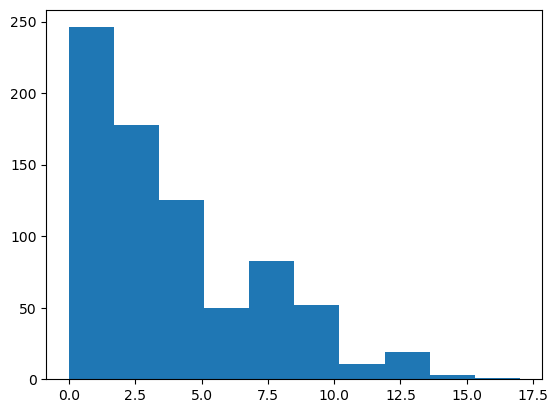

In [34]:
plt.hist(url_data['preg'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

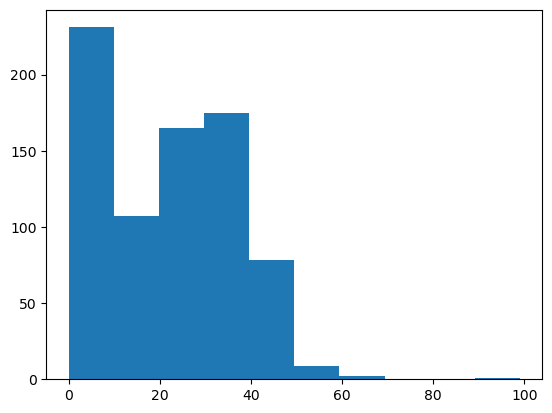

In [35]:
plt.hist(url_data.skin)

<AxesSubplot:>

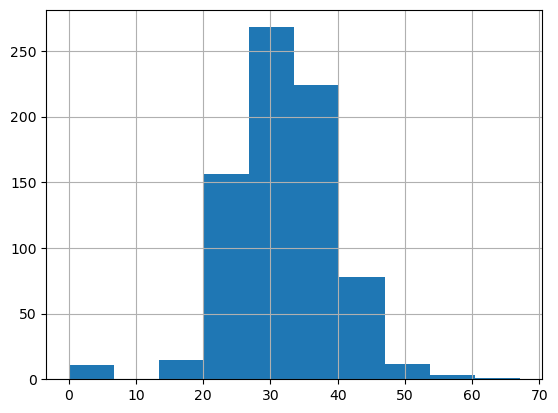

In [36]:
pdplt.hist_series(url_data.mass)

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

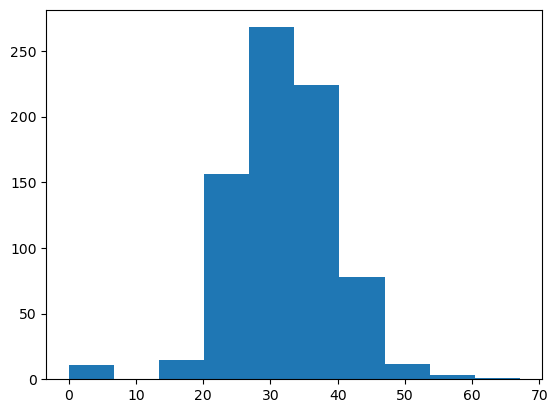

In [37]:
plt.hist(url_data.mass)

array([[<AxesSubplot:xlabel='preg', ylabel='preg'>,
        <AxesSubplot:xlabel='plas', ylabel='preg'>,
        <AxesSubplot:xlabel='pres', ylabel='preg'>,
        <AxesSubplot:xlabel='skin', ylabel='preg'>,
        <AxesSubplot:xlabel='test', ylabel='preg'>,
        <AxesSubplot:xlabel='mass', ylabel='preg'>,
        <AxesSubplot:xlabel='pedi', ylabel='preg'>,
        <AxesSubplot:xlabel='age', ylabel='preg'>,
        <AxesSubplot:xlabel='class', ylabel='preg'>],
       [<AxesSubplot:xlabel='preg', ylabel='plas'>,
        <AxesSubplot:xlabel='plas', ylabel='plas'>,
        <AxesSubplot:xlabel='pres', ylabel='plas'>,
        <AxesSubplot:xlabel='skin', ylabel='plas'>,
        <AxesSubplot:xlabel='test', ylabel='plas'>,
        <AxesSubplot:xlabel='mass', ylabel='plas'>,
        <AxesSubplot:xlabel='pedi', ylabel='plas'>,
        <AxesSubplot:xlabel='age', ylabel='plas'>,
        <AxesSubplot:xlabel='class', ylabel='plas'>],
       [<AxesSubplot:xlabel='preg', ylabel='pres'>,
        <A

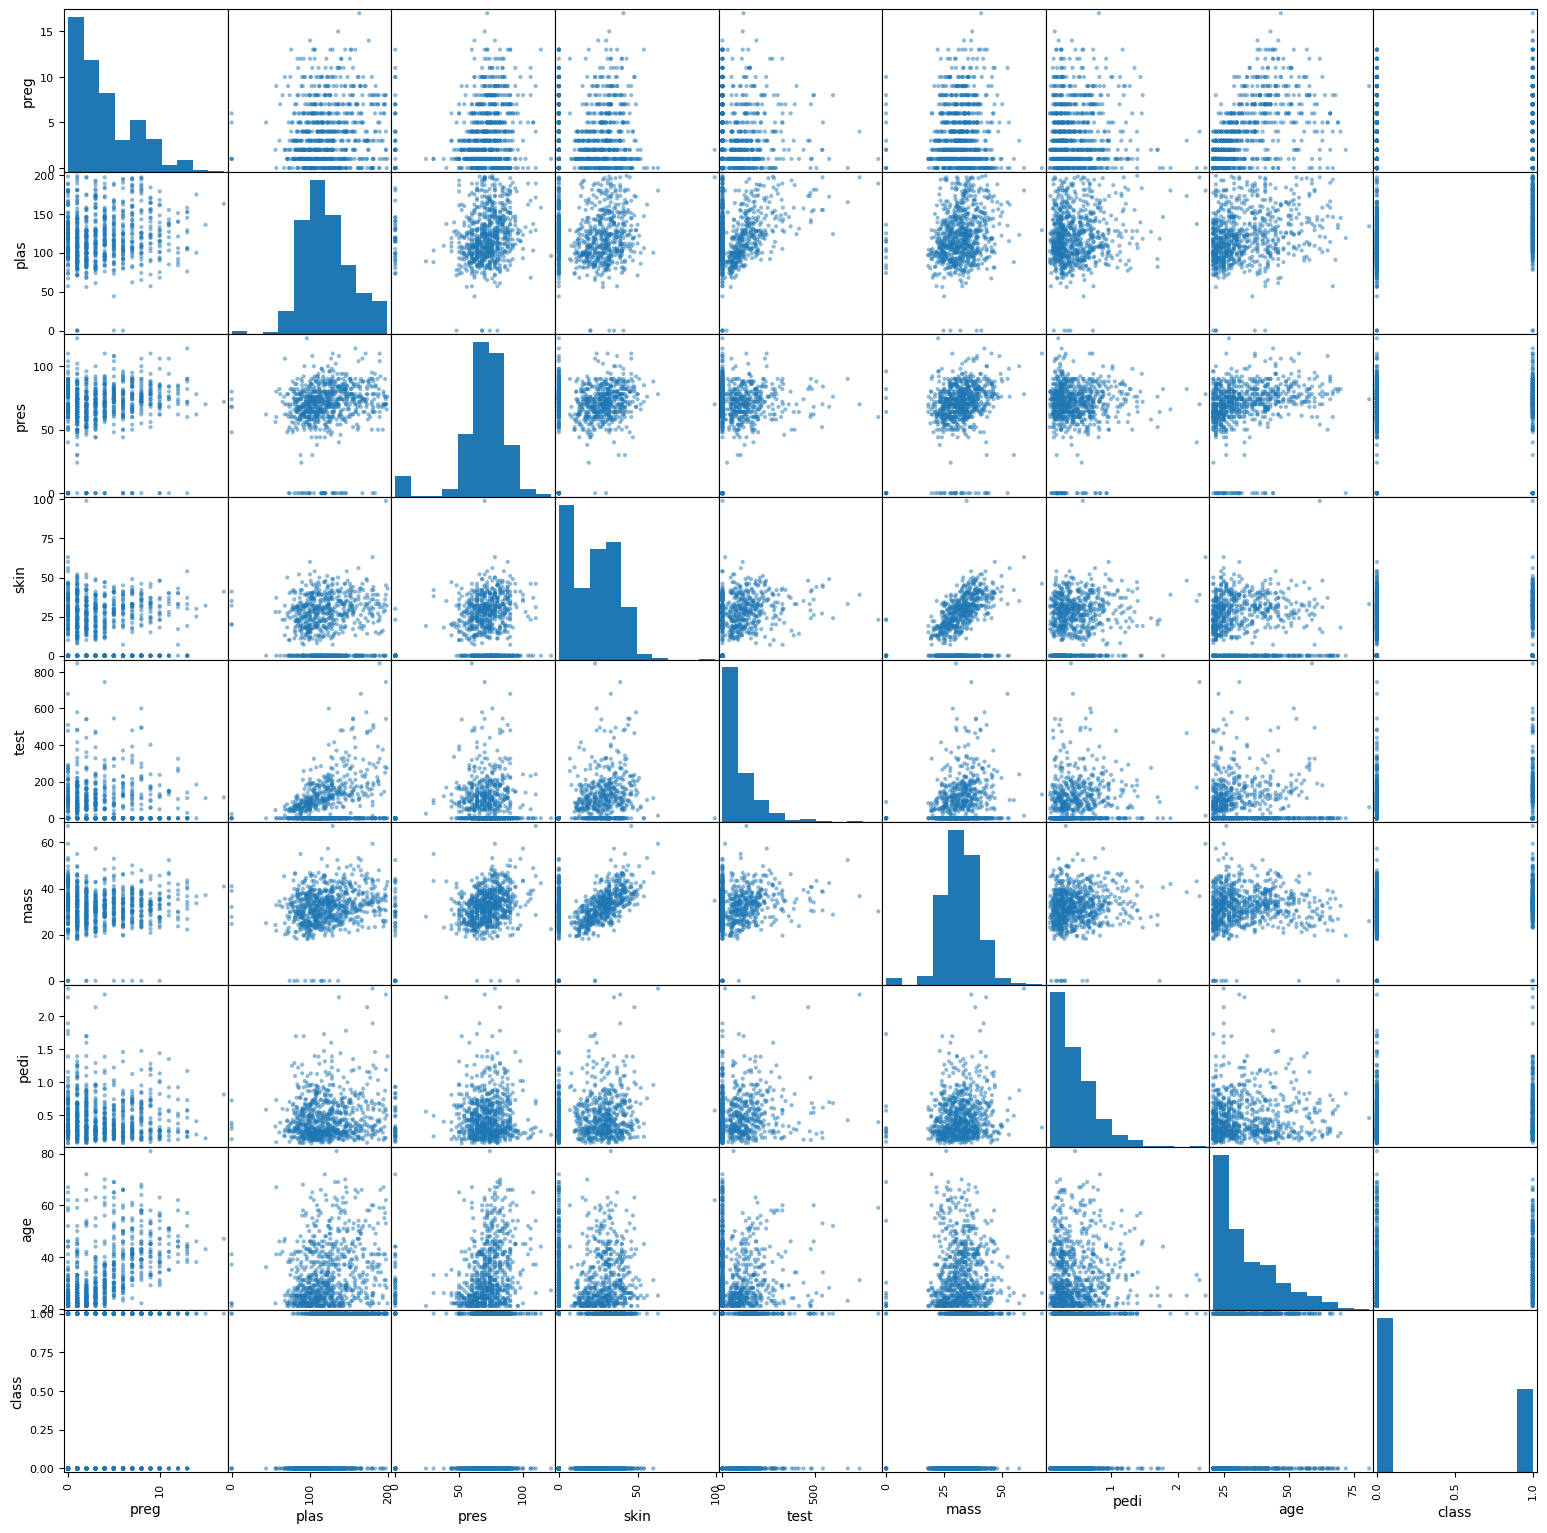

In [43]:
pdplt.scatter_matrix(url_data, figsize=(19,19))

{'whiskers': [<matplotlib.lines.Line2D at 0x217d7a80130>,
 'caps': [<matplotlib.lines.Line2D at 0x217d7a805b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217d7a73e20>,
 'medians': [<matplotlib.lines.Line2D at 0x217d7a80b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x217d7a80e20>,
 'means': []}

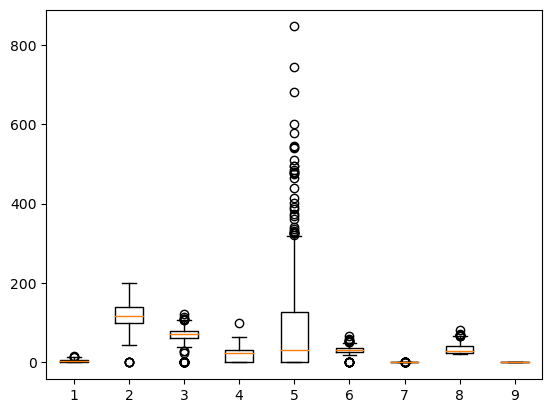

In [56]:
plt.boxplot(url_data)

#INFO : Box plots helps to identify the median, distribution of data, dispersion(spread or variability), outliers, skewness.
#If the quartiles are having same length, then it represents normal distribution

<AxesSubplot:>

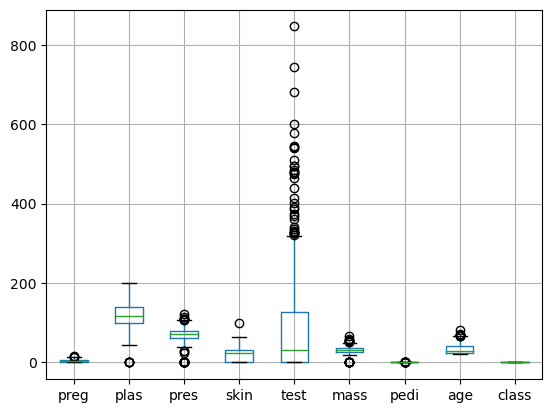

In [48]:
pdplt.boxplot(url_data)

<AxesSubplot:title={'center':'mass'}, xlabel='age'>

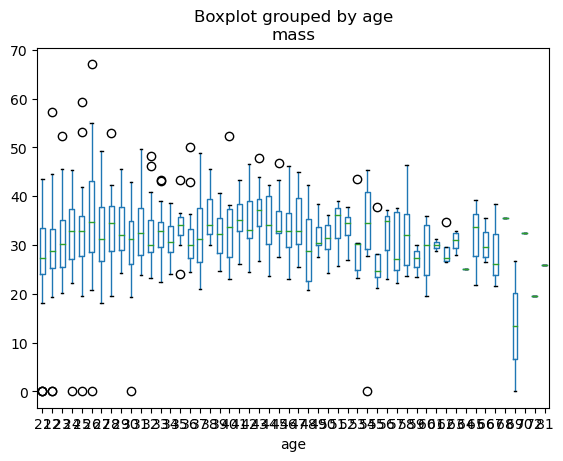

In [55]:
url_data.boxplot(by='age', column=['mass'], grid = False)

#### Data preprocessing

In [130]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data_load = pd.read_csv(url, names=names, delimiter=',')

#divide the X and Y variables
data_arr = data_load.values
diab_x = data_arr[:, 0:8]
diab_x_copy = diab_x.copy()
diab_Y = data_arr[:, 8]
np.set_printoptions(precision=3)
print(diab_x[0:5, :])
print("--------------------------------------------------")

#Standardizing the data using Standard Scaler
#INFO: mean of 0 and sd 1.It helps to give same importance to all the values. values 1 is not greater than 8 or vice versa
scaler = StandardScaler().fit(diab_x)
rescaled_X_std = scaler.transform(diab_x)
print(rescaled_X_std[0:5, :])

# INFO:
#axis=0 means axis runs down the rows(represents each feature of all instances). 
# axis=1 means axis runs through the columns(represents each instance)
print("--------------------------------------------------")
print(rescaled_X_std.std(axis=0))
print(rescaled_X_std.mean(axis=0)) 
print("--------------------------------------------------")

#Normalizing the data using Normalizer
# INFO: normalize the values to range of 0 and 1.Helpful when using distance methods
normalizer = Normalizer().fit(diab_x)
rescaled_X_norm = normalizer.transform(diab_x)
print(rescaled_X_norm[0:5, :])
print("--------------------------------------------------")

#Binarizing the data using Binarizer
#INFO: Binarize the data of certain threshold to 1 and less than the threshold to 0.Helpful for count usecases
binarizer = Binarizer().fit(diab_x)
rescaled_X_binarized = binarizer.transform(diab_x)
print(rescaled_X_binarized[0:5, :])
print("--------------------------------------------------")

#MinMaxscaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1)).fit(diab_x_copy)
rescaled_X_min_max = min_max_scaler.transform(diab_x_copy)
print(rescaled_X_binarized[0:5, :])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
--------------------------------------------------
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]
--------------------------------------------------
[1. 1. 1. 1. 1. 1. 1. 1.]
[-6.476e-17 -9.252e-18  1.503e-17  1.006e-16 -3.007e-17  2.591e-16
  2.452e-16  1.931e-16]
--------------------------------------------------
[[0.034 

#### Resampling methods for splitting and algorithm evaluation

In [248]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

# Train Test Split
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, shuffle=True, random_state=0)
#INFO: random_state=anynumber is to  make sure the train and test split samples are same after random shuffling.
print("<---------------Shapes------------------>")
print(x_train.shape)
print(Y_train.shape)
print(Y_test.shape)
print(x_test.shape)

train_split_clf = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, Y_train)

train_test_acc = train_split_clf.score(x_train, Y_train)
print("<----------------------------------------->")
print("Accuracy for train test split %.2f" % train_test_acc)

clf = LogisticRegression(solver='liblinear', random_state=0)

# K-FOLD
k_fold_cv = KFold(n_splits=5, shuffle=True, random_state=0)
cv_score = cross_val_score(clf, x_train, Y_train, cv=k_fold_cv)
print("<----------------------------------------->")
print("Accuracies for each fold in 5 folds CV {}" .format(cv_score))
print("Average accuracy of all the folds:  %.2f%%" % cv_score.mean())
print("Standard deviation for K-fold CV: %.2f" %cv_score.std())

# Stratified Sampling
stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
stratified_score = cross_val_score(clf, x_train, Y_train, cv=stratified)
print("<----------------------------------------->")
print("Accuracies for stratified sampling {}" .format(stratified_score))
print("Average accuracy of all the folds: %.2f" % stratified_score.mean())
print("Standard deviation/SE for stratified sampling: %.2f" %stratified_score.std())

# Leave One out
loocv = LeaveOneOut()
loocv_score = cross_val_score(clf, x_train, Y_train, cv=loocv)
print("<----------------------------------------->")
print("Accuracy for loocv: %.2f%%" % loocv_score.mean())
print("Standard deviation for loocv: %.2f" %loocv_score.std())



<---------------Shapes------------------>
(460, 8)
(460,)
(308,)
(308, 8)
<----------------------------------------->
Accuracy for train test split 0.76
<----------------------------------------->
Accuracies for each fold in 5 folds CV [0.717 0.761 0.826 0.707 0.739]
Average accuracy of all the folds:  0.75%
Standard deviation for K-fold CV: 0.04
<----------------------------------------->
Accuracies for stratified sampling [0.696 0.804 0.772 0.772 0.696]
Average accuracy of all the folds: 0.75
Standard deviation/SE for stratified sampling: 0.04
<----------------------------------------->
Accuracy for loocv: 0.75%
Standard deviation for loocv: 0.43


#### Algorithm evaluation metrics

log_likelihood_score: -0.5202892804379677
accuracy_score: 0.75
f1_score: 0.5914942528735632
              precision    recall  f1-score   support

        0-No       0.80      0.92      0.86       205
       1-Yes       0.78      0.54      0.64       103

    accuracy                           0.80       308
   macro avg       0.79      0.73      0.75       308
weighted avg       0.79      0.80      0.78       308



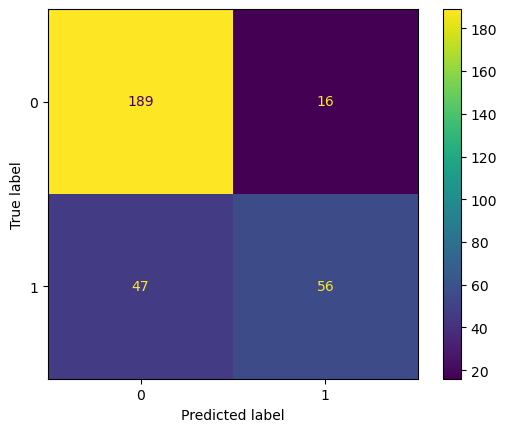

In [191]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)

clf = LogisticRegression(solver='liblinear')
kfold_cv = KFold(n_splits=5, random_state=0, shuffle=True)
log_likelihood_score = cross_val_score(clf, x_train, y_train,cv=kfold_cv, scoring='neg_log_loss')
accuracy_score = cross_val_score(clf, x_train, y_train, cv=kfold_cv, scoring='accuracy')
f1_score = cross_val_score(clf, x_train, y_train, cv=kfold_cv, scoring='f1')
print("log_likelihood_score: {}".format(log_likelihood_score.mean()))
print("accuracy_score: {}".format(accuracy_score.mean()))
print("f1_score: {}".format(f1_score.mean()))

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
cls_report = classification_report(y_test, y_pred, target_names=['0-No', '1-Yes'])
print(cls_report)

#### Spot Check Algorithms

Linear regression estimator mse: -24.38
KNN regressor estimator mse: -46.56
SVM regressor mse: -69.02
Decision Tree score: 1.00
Nodes importances: [7.882e-02 1.931e-06 6.528e-03 7.747e-04 2.070e-02 2.508e-01 1.388e-02
 7.275e-03 3.661e-03 1.911e-02 3.762e-02 4.248e-03 5.565e-01]
Best Decision Tree score: 0.68
Random forest score: 0.98
Random forest nodes importances: [0.033 0.001 0.009 0.002 0.016 0.329 0.014 0.036 0.005 0.018 0.027 0.011
 0.498]
SGB score: 0.99


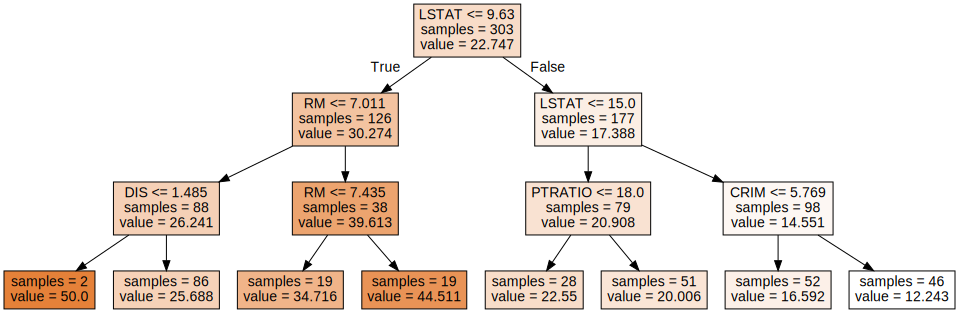

In [300]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(url, delim_whitespace=True, names=names)
# Exploratory analysis
# pdplt.boxplot(dataframe)
# corr = dataframe.corr()
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
# data_arr = dataframe.copy().values
#Separating the values
data_arr = dataframe.values
X = data_arr[:, 0:13]
Y = data_arr[:, 13]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)
kfold_cv = KFold(n_splits=10, shuffle=True, random_state=0)

linear_reg = LinearRegression()
linear_reg_score = cross_val_score(linear_reg,  x_train, y_train, cv=k_fold_cv, scoring='neg_mean_squared_error')
print("Linear regression estimator mse: %.2f" % linear_reg_score.mean())

KNN_reg = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
KNN_reg_score = cross_val_score(KNN_reg,  x_train, y_train, cv=k_fold_cv, scoring=scoring)
print("KNN regressor estimator mse: %.2f" %(KNN_reg_score.mean()))

SVM_reg = SVR()
SVM_reg_score = cross_val_score(SVM_reg, x_train, y_train, cv=kfold_cv, scoring='neg_mean_squared_error')
print("SVM regressor mse: %.2f" %SVM_reg_score.mean())

tree_reg = DecisionTreeRegressor().fit(x_train, y_train)
print("Decision Tree score: %.2f" % tree_reg.score(x_train, y_train))
print("Nodes importances: {}".format(tree_reg.feature_importances_)) #Only 3 nodes/featured seems important

tree = DecisionTreeRegressor(max_depth=3).fit(x_train, y_train)
cv_df = KFold(n_splits=5, shuffle=True, random_state=0)
df_score = cross_val_score(tree, x_train, y_train, cv=cv_df)
print("Best Decision Tree score: %.2f" % df_score.mean())
# print("Nodes importances: {}".format(tree.feature_importances_))

randomforest = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print("Random forest score: %.2f" % randomforest.score(x_train, y_train))
print("Random forest nodes importances: {}".format(randomforest.feature_importances_))

Stochastic_Gradient_Boosting = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, max_depth=4, 
                                                         min_samples_split=5, subsample=0.8).fit(x_train, y_train) #subsample < 1.0 makes it stochastic gradient boosting
print("SGB score: %.2f" % Stochastic_Gradient_Boosting.score(x_train, y_train))

# Create the tree:
export_graphviz(tree, out_file="mytree.dot", feature_names = names[0:13], impurity=False, filled=True)
#Tree visualisation:
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)



#### Model Comparison and Selection

In [321]:
diab_X, diab_Y = load_diabetes(return_X_y=True, as_frame=True)
models = []
models.extend([
    ('LR', LinearRegression()), ('LDA', LinearDiscriminantAnalysis()),
    ('SVM', SVR()), ('KNNC', KNeighborsClassifier(n_neighbors=5)),
    ('KNNR', KNeighborsRegressor(n_neighbors=5)), ('RF', RandomForestRegressor()), 
    ('LogR', LogisticRegression(solver='liblinear')),  ('SGB', GradientBoostingRegressor()), 
])
results = []
for name, model in models:
    print("Model {} is running".format(name))
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    result = cross_val_score(model, diab_X, diab_Y, cv=kfold)
    results.append((name, result.mean()))
print(results)

# We have to mindfully compare the models based on the metric that the models are using.
#This is just a generic example of different models where each model has different scoring metric used as we didnt specify any scoring metric specifically in cv.
#Observe the scores

Model LR is running
Model LDA is running
Model SVM is running
Model KNNC is running
Model KNNR is running
Model RF is running
Model LogR is running
Model SGB is running
[('LR', 0.4891549734453946), ('LDA', 0.004545454545454545), ('SVM', 0.1576955913011141), ('KNNC', 0.0), ('KNNR', 0.3823763293484394), ('RF', 0.4342769676300124), ('LogR', 0.0022727272727272726), ('SGB', 0.4205732447972922)]


In [342]:
#Comparing classification algorithms Logistic Regression and LDA
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True) #from csv
diab_X, diab_Y = load_diabetes(return_X_y=True, as_frame=True) #from scikit
models = []
models.extend([
    ('LogR', LogisticRegression(solver='liblinear')), ('LDA', LinearDiscriminantAnalysis()),
])
results = []
input = [('scikit-source', diab_X, diab_Y), ('csv-source', x_train, y_train)]
for source, input_x, input_y in input:
    src = source
    x, y = input_x, input_y
    for name, model in models:
        print("Model {} is running".format(name))
        kfold = KFold(n_splits=10, shuffle=True, random_state=0)
        result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
        results.append((src, name, result.mean()))
print(results)
#results accuracy varies highly when using the same diabetes dataset from csv file rather than scikit


Model LogR is running
Model LDA is running
Model LogR is running
Model LDA is running
[('scikit-source', 'LogR', 0.004545454545454545), ('scikit-source', 'LDA', 0.00909090909090909), ('csv-source', 'LogR', 0.75), ('csv-source', 'LDA', 0.7413043478260869)]


#### Algorithm Tuning to improve accuracy

In [365]:
#Grid Search
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)
model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': [1,10],
    'solver' : ['liblinear'],
    'multi_class': ['auto', 'ovr']
}
grid = GridSearchCV(estimator=model, param_grid=params, refit=True, cv=10, error_score='raise')
#error_score='raise will help to debug the error of fitfailures while doing gridsearch using specified params'
clf = grid.fit(x_train, y_train)
print(sorted(clf.cv_results_))
print(clf.best_estimator_)
print(clf.best_score_)
print(clf.best_params_)


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_multi_class', 'param_penalty', 'param_solver', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
LogisticRegression(C=1, penalty='l1', solver='liblinear')
0.7456521739130435
{'C': 1, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\malla\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(C=1, penalty='l1', solver='liblinear')
{'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'auto', 'C': 1}
0.7521739130434782
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       205
         1.0       0.77      0.53      0.63       103

    accuracy                           0.79       308
   macro avg       0.79      0.73      0.74       308
weighted avg       0.79      0.79      0.78       308



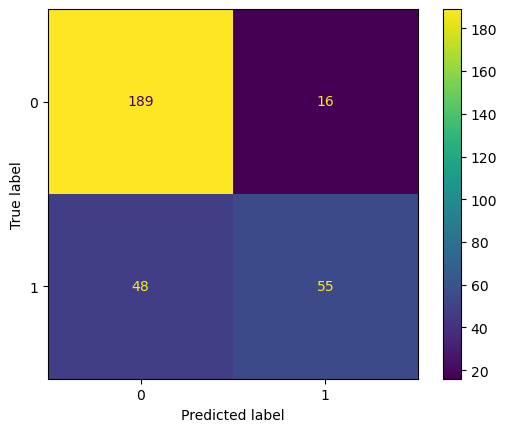

In [371]:
#Random Search
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)
model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2'],
    'C': [1,10],
    'solver' : ['liblinear'],
    'multi_class': ['auto', 'ovr']
}
random_grid = RandomizedSearchCV(
    estimator=model, param_distributions=params, refit=True, error_score='raise'
)
clf = random_grid.fit(x_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)
y_est = clf.predict(x_test)
cm = confusion_matrix(y_test, y_est)
ConfusionMatrixDisplay(cm).plot()
cr = classification_report(y_test, y_est)
print(cr)


#### Using Ensembles to improve the model scores/accuracies

In [379]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)

rfmodel = RandomForestClassifier(n_estimators=200, max_features=6)
extramodel = ExtraTreesClassifier(n_estimators=300, max_features=6)
adamodel = AdaBoostClassifier(n_estimators=300, learning_rate=0.01)

extratree_clf = extramodel.fit(x_train, y_train)
rf_clf = rfmodel.fit(x_train, y_train)
ada_clf = adamodel.fit(x_train, y_train)

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

RFC_score = cross_val_score(rf_clf, x_train, y_train, cv=kfold, scoring='accuracy')
extramodel_score = cross_val_score(extratree_clf, x_train, y_train, cv=kfold, scoring='accuracy')
adamodel_score = cross_val_score(ada_clf, x_train, y_train, cv=kfold, scoring='accuracy')

print("Random Forest classifier score: %.2f" % RFC_score.mean())
print("Extra Tree classifier score: %.2f" % extramodel_score.mean())
print("AdaBoosting classifier score: %.2f" % adamodel_score.mean())

Random Forest classifier score: 0.74
Extra Tree classifier score: 0.73
AdaBoosting classifier score: 0.73


#### Saving the Model

In [382]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names, delimiter=',')
data_arr = data.copy().values
X = data_arr[:, 0:8]
Y = data_arr[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0, shuffle=True)

rfmodel = RandomForestClassifier(n_estimators=200, max_features=6)
rfmodel.fit(x_train, y_train)

pkl.dump(rfmodel, open('randomforestmdl.sav', 'wb'))

loaded_model = pkl.load(open('randomforestmdl.sav', 'rb'))
result = loaded_model.score(x_test, y_test)

print("Estimator accuracy {}".format(result))



Estimator accuracy 0.7564935064935064


(150, 4)
(150,)
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
int32
[0, 1, 2]
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


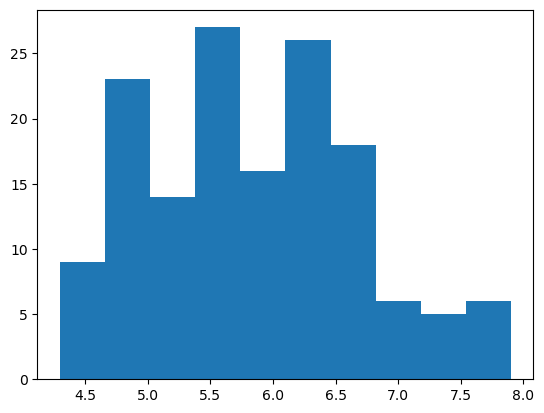

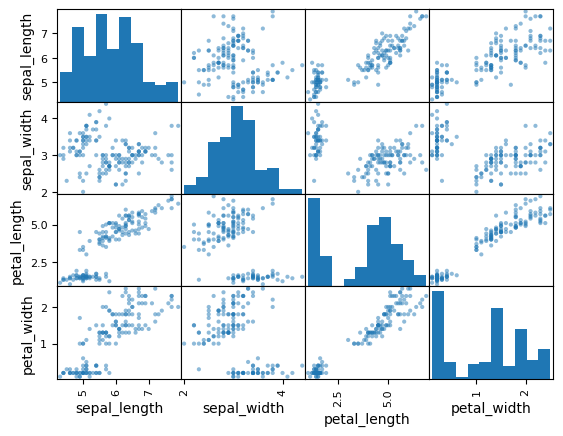

[[0.804 0.552 0.221 0.032]
 [0.828 0.507 0.237 0.034]
 [0.805 0.548 0.223 0.034]
 [0.8   0.539 0.261 0.035]
 [0.791 0.569 0.221 0.032]]
[0.751 0.405 0.455 0.141]
Model RF: Training accuracy: 0.966667
Model RF: Training error: 0.050918
Model MNB: Training accuracy: 0.755556
Model MNB: Training error: 0.215452
Model SVM: Training accuracy: 0.966667
Model SVM: Training error: 0.050918
Model KNN: Training accuracy: 0.966667
Model KNN: Training error: 0.050918
Model LogR: Training accuracy: 0.944444
Model LogR: Training error: 0.113855
Model LDA: Training accuracy: 0.988889
Model LDA: Training error: 0.033333
LinearDiscriminantAnalysis(tol=0.1)
{'tol': 0.1}
0.9888888888888889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.96      0.96      0.96        23
           2       0.95      0.95      0.95        21

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97     

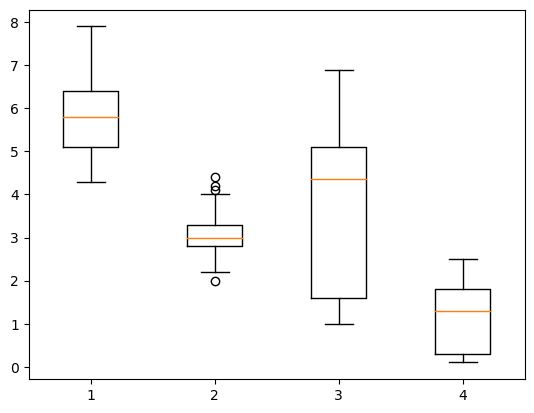

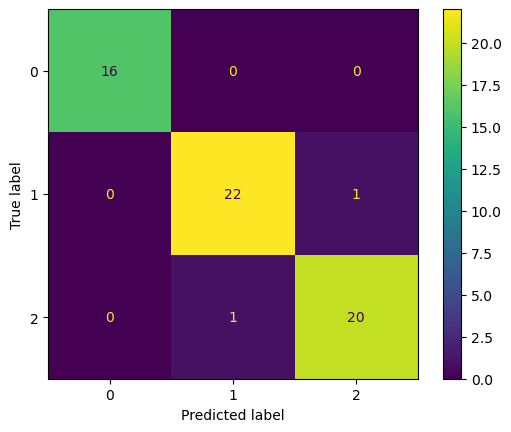

In [448]:
#Loading the data
iris_data, iris_target = load_iris(return_X_y=True, as_frame=True)
iris_data.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#Descriptive stats
print(iris_data.shape)
print(iris_target.shape)
print(iris_data.describe())
print(iris_target.dtypes)
print(iris_target.unique().tolist())
print(iris_data.corr()) #petal length and petal width seems highly correlated and also sepal length and petal length

#visualisation
plt.hist(iris_data['sepal_length'])
pdplt.scatter_matrix(iris_data)
plt.show()
plt.boxplot(iris_data)
# pdplt.hist_series(iris_data['sepal_length'])

#Data preprocessing
# scaler = StandardScaler().fit(iris_data)
# rescaled_data = scaler.transform(iris_data)
# print(type(rescaled_data))
# print(rescaled_data[0:5, :])
# print(rescaled_data.mean(axis=0))

normalizer = Normalizer().fit(iris_data)
normalized_data = normalizer.transform(iris_data)
print(normalized_data[0:5, :])
print(normalized_data.mean(axis=0))

#Resampling
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.4, shuffle=True, random_state=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Algorithm metrics evaluation and model selection
models = {
    ('LogR', LogisticRegression(solver='liblinear')),
    ('SVM', SVC()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('RF', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=6)),
    ('MNB', MultinomialNB())
}

for name, model in models:
    result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    print("Model %s: Training accuracy: %f" %(name, result.mean()))
    print("Model %s: Training error: %f" %(name, result.std()))

#Tuning parameters using grid search
params = {'tol':[0.1, 0.001, 0.0001, 0.0001]}
grid = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=params, refit=True, cv=10, error_score='raise'
)
results = grid.fit(x_train, y_train)
print(results.best_estimator_)
print(results.best_params_)

#Model training
final_model = LinearDiscriminantAnalysis(tol=0.1)
final_model.fit(x_train, y_train)
print(final_model.score(x_train, y_train))
y_est = final_model.predict(x_test)
cm = confusion_matrix(y_test, y_est)
ConfusionMatrixDisplay(cm).plot()
cr = classification_report(y_test, y_est)
print(cr)
